In [1]:
import pandas as pd
import requests
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# URL to the raw CSV file
url = "https://raw.githubusercontent.com/SRAVAN-IITB/Molecular-Drug-Discovery-using-Graphical-Neutral-Networks/1b35ba8bcab1619a1d9df8944ad584f42196710b/Week1/Assignment1/Student_Performance.csv"

# Send a GET request to fetch the raw CSV content
response = requests.get(url)


In [3]:
# Save the content as a CSV file locally
with open('Student_Performance.csv', 'wb') as file:
    file.write(response.content)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Student_Performance.csv')

# Display the first few rows
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
# Convert categorical variable to numerical (0 for 'No', 1 for 'Yes')
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [10]:
# Separate features (X) and target (y)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [11]:
# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=9)


### Linear Regression Model using Gradient Descent

In [14]:
# Initialize parameters
m, n = X_train.shape  # m: number of examples, n: number of features
theta = np.zeros(n)  # Initialize weights (theta) to zero
learning_rate = 0.01  # Learning rate
iterations = 1000  # Number of iterations

In [15]:
# Gradient Descent Algo
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y               # Errors (predictions - actual)
        gradient = np.dot(X.T, loss) / m    # Gradient of cost fn
        theta -= learning_rate * gradient   # update theta
        cost_history[i] = (1/(2*m)) * np.sum(loss**2)  # Calculate and store the cost function value

    return theta, cost_history

# Perform gradient descent to optimize theta
theta_optimized, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)



### Evaluating model using RMSE

In [19]:
predictions = X_test.dot(theta_optimized)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE on test set: {rmse:.4f}")

RMSE on test set: 55.3282


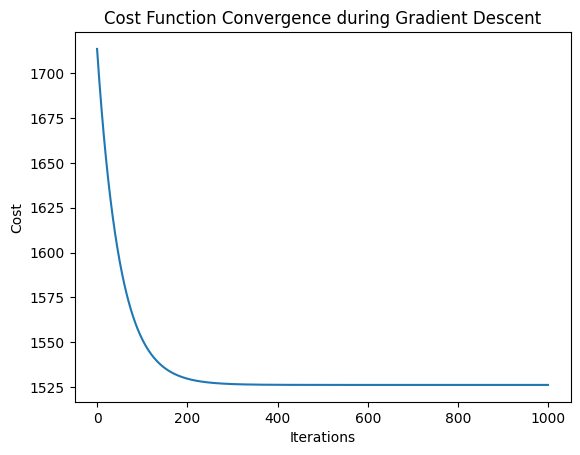

In [22]:
# Plotting the cost history to show convergence of gradient descent
import matplotlib.pyplot as plt
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence during Gradient Descent")
plt.show()

In [23]:
# So 400 iterations seems sufficient; we need not go till iter=1000;